In [4]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [19]:
im = cv2.imread('Canopic-Jar.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,230,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

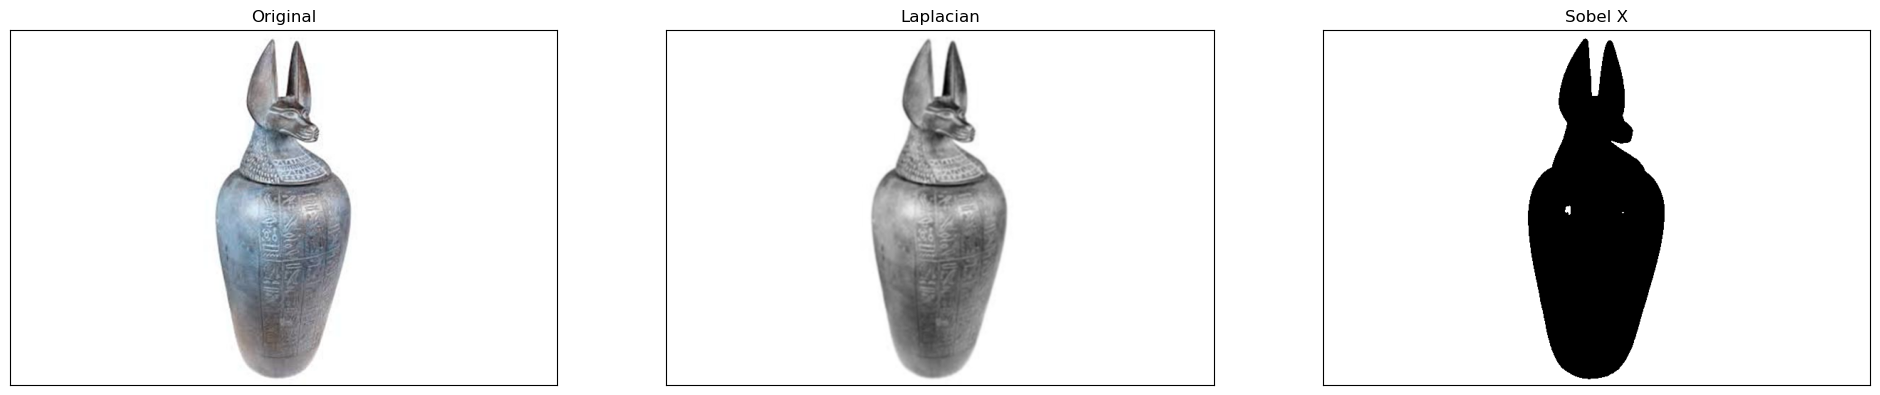

In [20]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [21]:
kernel3 = np.ones((3,3),np.uint8)
kernel5 = np.ones((5,5),np.uint8)
kernel7 = np.ones((7,7),np.uint8)
erosion = cv2.erode(thresh, kernel5, iterations = 1)

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel5)


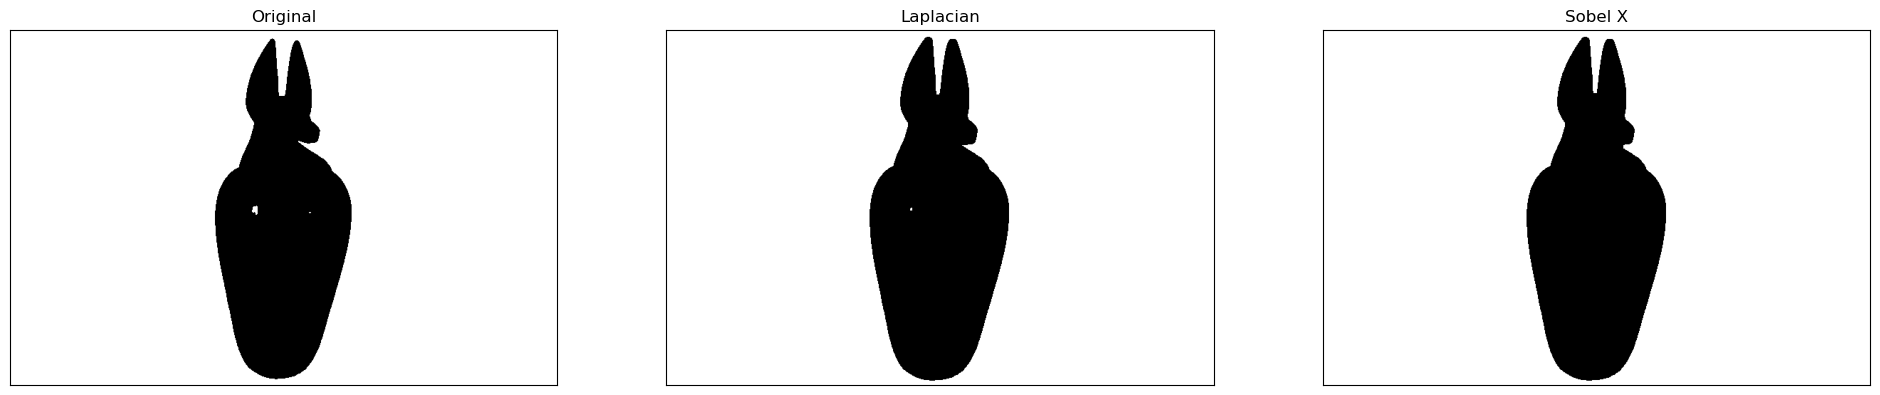

In [22]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(thresh,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(erosion,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(opening,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [23]:
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 0, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 1, (0,255,0), 3)


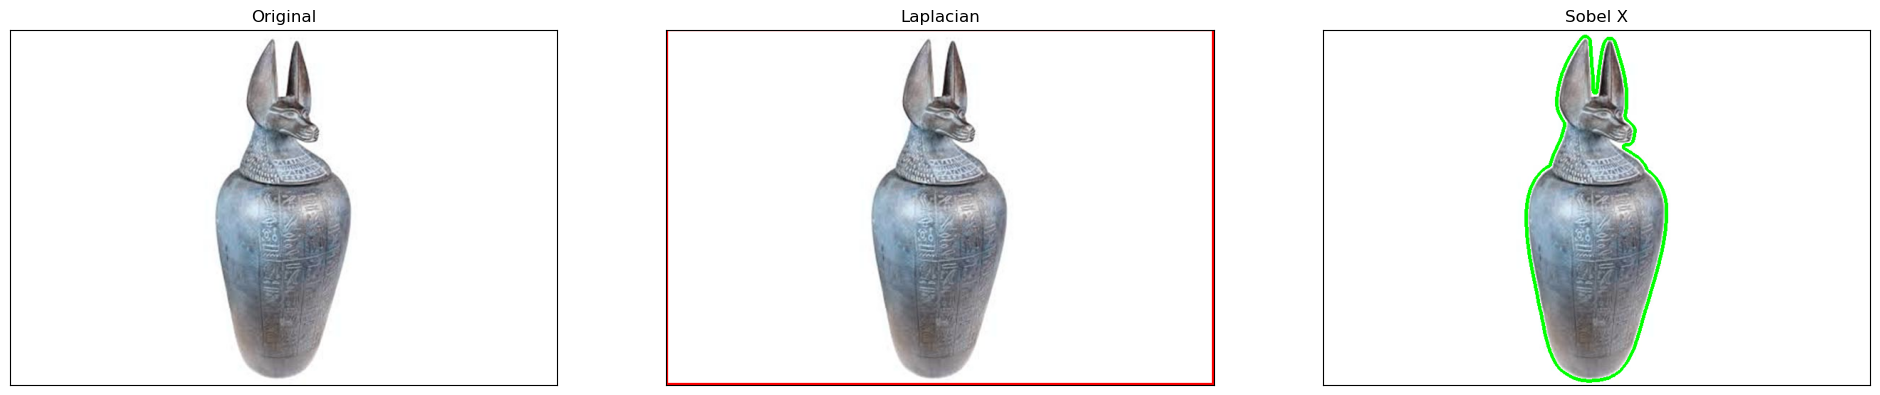

In [24]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img0,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img1,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [25]:
cnt = contours[1]
M = cv2.moments(cnt)
print(M)

{'m00': 62927.5, 'm10': 23972251.833333332, 'm01': 17254173.333333332, 'm20': 9258010841.25, 'm11': 6565935550.458333, 'm02': 5591924370.083333, 'm30': 3622969526197.75, 'm21': 2534770680116.5664, 'm12': 2124686980593.8333, 'm03': 1985060635109.7002, 'mu20': 125773616.49526978, 'mu11': -7047458.91993618, 'mu02': 860980070.4256153, 'mu30': 300248387.53125, 'mu21': 1674071213.0016098, 'mu12': -1693744479.6762085, 'mu03': -20342902161.712646, 'nu20': 0.03176205490489415, 'nu11': -0.0017797196533934241, 'nu02': 0.2174263333670341, 'nu30': 0.00030225917171298637, 'nu21': 0.0016852825835001557, 'nu12': -0.001705087603400001, 'nu03': -0.020479139982051066}


In [26]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [27]:
print(cx, cy)

380 274


In [28]:
area = cv2.contourArea(cnt)

In [81]:
print(area)

62927.5


In [29]:
perimeter = cv2.arcLength(cnt,True)

In [83]:
print(perimeter)

1361.7026588916779


In [30]:
epsilon = 0.01*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [93]:
print(epsilon)

13.61702658891678


In [94]:
print(approx)

[[[366  10]]

 [[380  89]]

 [[394  20]]

 [[410  18]]

 [[438 140]]

 [[422 167]]

 [[482 244]]

 [[437 448]]

 [[377 494]]

 [[318 452]]

 [[285 277]]

 [[291 223]]

 [[339 137]]

 [[335  62]]]


In [31]:
img1 = cv2.circle(img1,(cx,cy),5,(0,0,255),-1)

In [32]:
img2 = im.copy()
img2 = cv2.drawContours(img2, approx, -1, (0,0,255), 3)

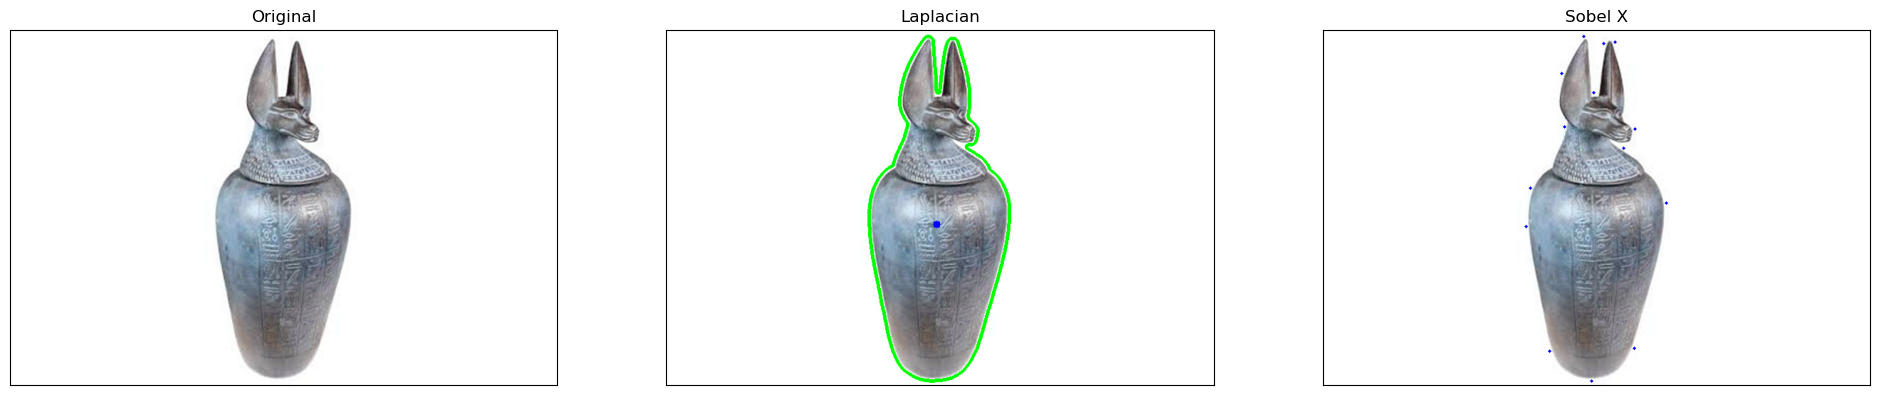

In [33]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [34]:
x,y,w,h = cv2.boundingRect(cnt)
img2 = cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),2)

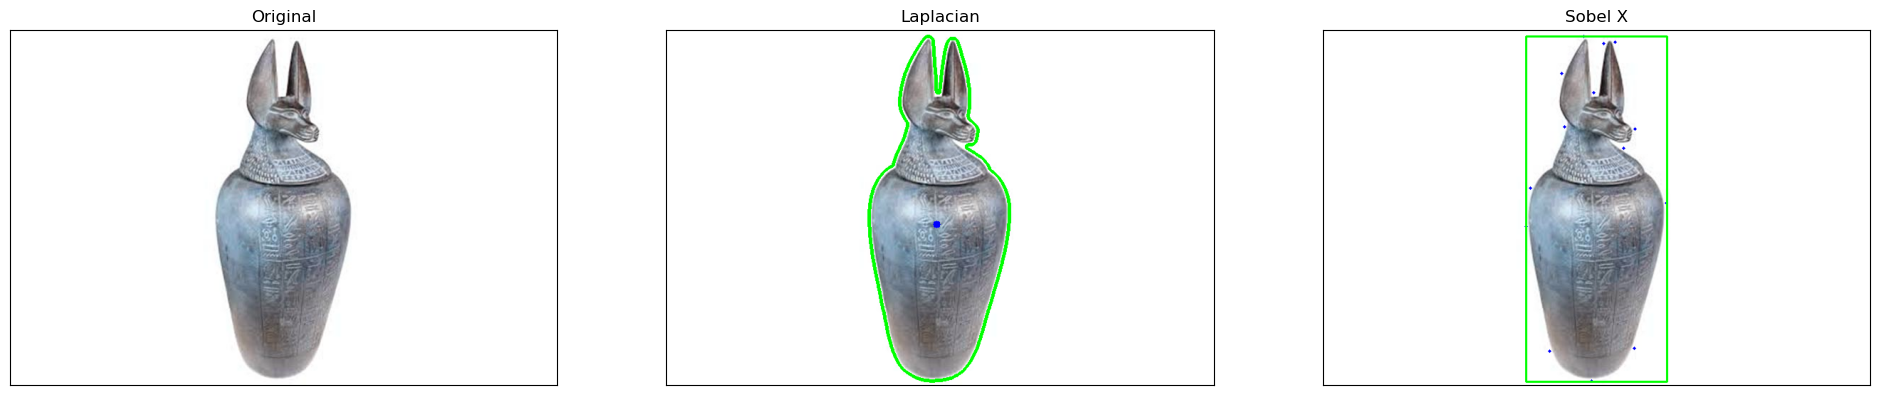

In [35]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [36]:
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
img1 = cv2.drawContours(img1,[box],0,(0,0,255),2)

C:\Users\U209-6\AppData\Local\Temp\ipykernel_780\1864750122.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


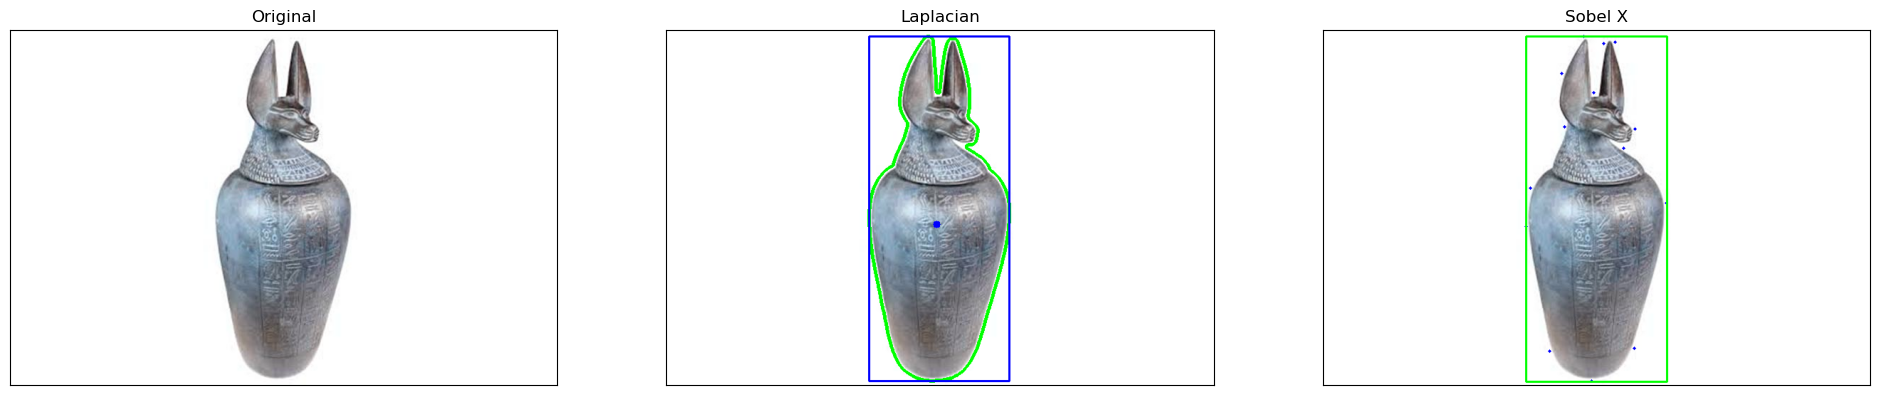

In [37]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [38]:
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img1 = cv2.circle(img1,center,radius,(0,255,0),2)

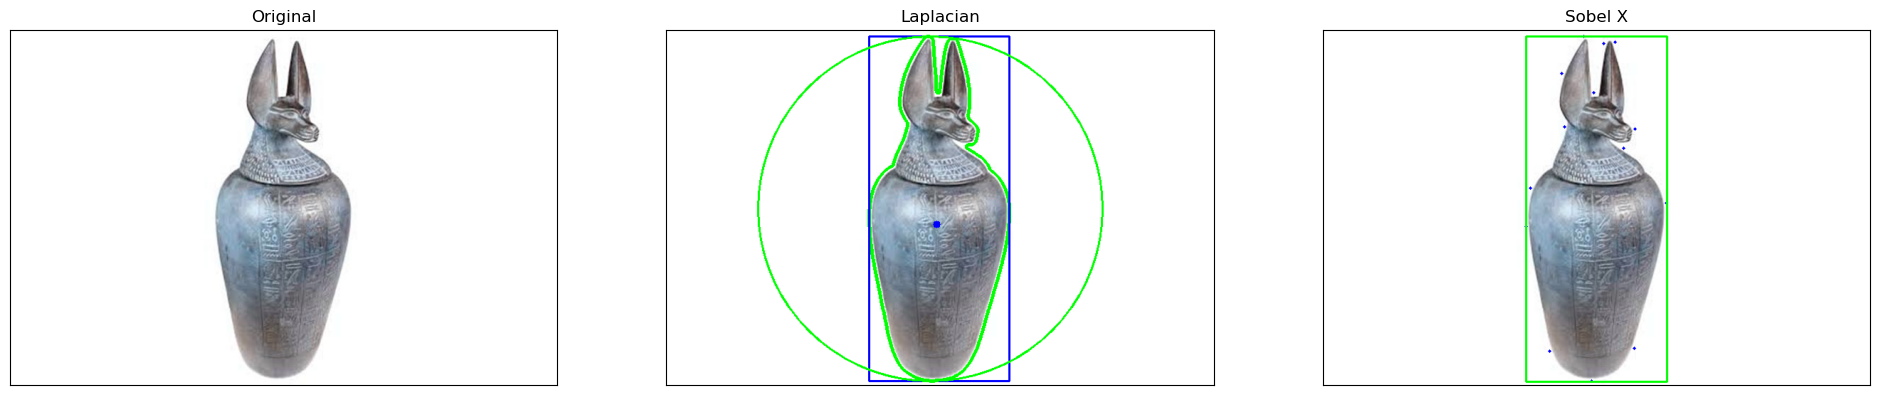

In [39]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [40]:
ellipse = cv2.fitEllipse(cnt)
img1 = cv2.ellipse(img1,ellipse,(0,255,0),2)

In [41]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img1 = cv2.line(img1,(cols-1,righty),(0,lefty),(0,255,0),2)

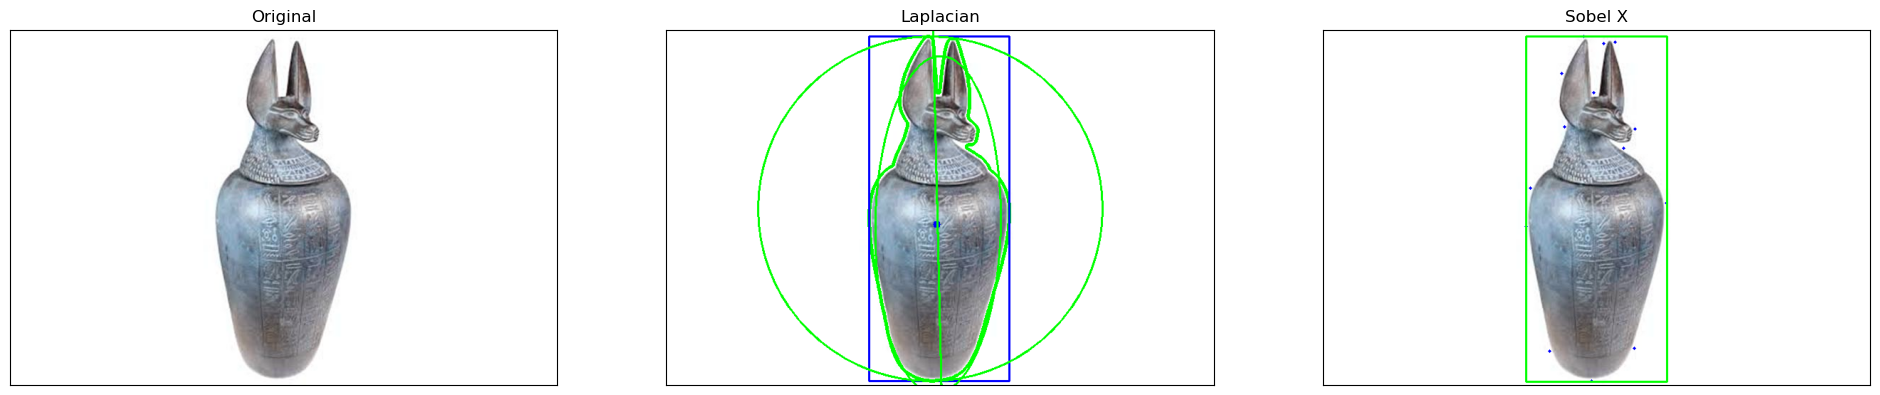

In [42]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(img2)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
img = cv2.imread('20241028_122740.png')
edges100 = cv2.Canny(img,100,100)
edges200 = cv2.Canny(img,200,200)
edges = cv2.Canny(img,100,200)

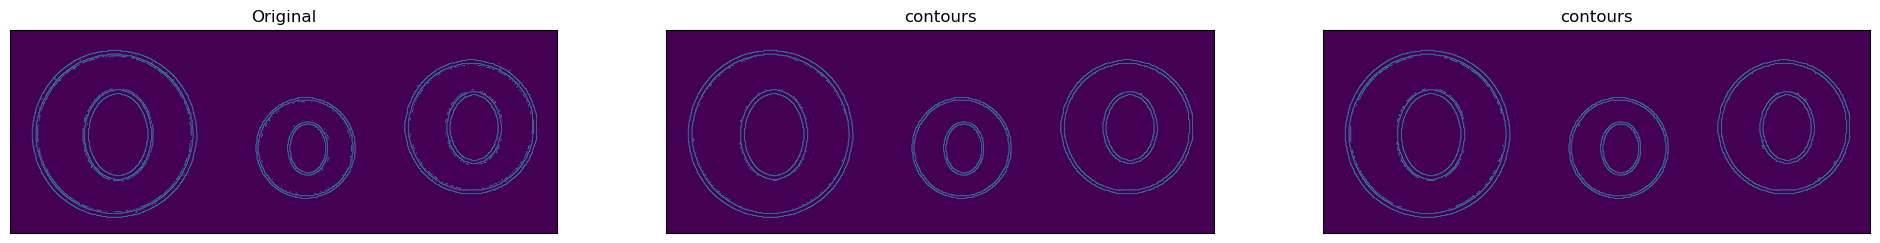

In [7]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(edges100)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(edges200)
plt.title('contours'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(edges)
plt.title('contours'), plt.xticks([]), plt.yticks([])

plt.show()


In [8]:
contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = img.copy()
img1 = cv2.drawContours(img0, contours, -1, (255,0,0), 5)

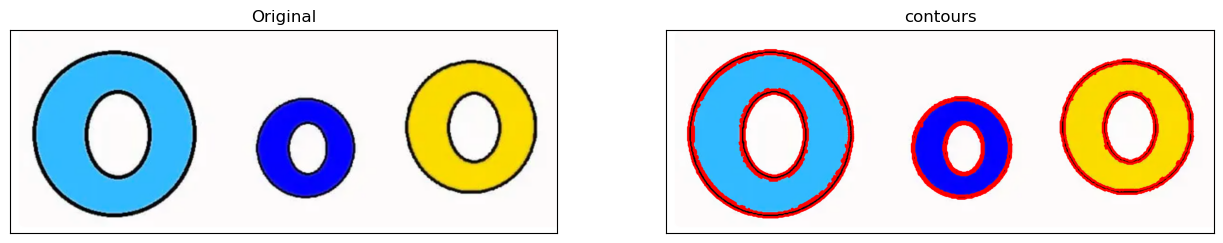

In [9]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('contours'), plt.xticks([]), plt.yticks([])

plt.show()


In [58]:
print(len(contours))

142


In [23]:
print(contours[4])

[[[1264  671]]

 [[1262  673]]

 [[1260  673]]

 [[1256  677]]

 [[1255  677]]

 [[1254  678]]

 [[1253  678]]

 [[1251  680]]

 [[1250  680]]

 [[1248  682]]

 [[1247  682]]

 [[1245  684]]

 [[1244  684]]

 [[1242  686]]

 [[1241  686]]

 [[1240  687]]

 [[1239  687]]

 [[1237  689]]

 [[1236  689]]

 [[1234  691]]

 [[1233  691]]

 [[1230  694]]

 [[1229  694]]

 [[1227  696]]

 [[1226  696]]

 [[1224  698]]

 [[1223  698]]

 [[1221  700]]

 [[1220  700]]

 [[1219  701]]

 [[1218  701]]

 [[1216  703]]

 [[1215  703]]

 [[1213  705]]

 [[1212  705]]

 [[1210  707]]

 [[1209  707]]

 [[1206  710]]

 [[1205  710]]

 [[1203  712]]

 [[1202  712]]

 [[1200  714]]

 [[1199  714]]

 [[1198  715]]

 [[1197  715]]

 [[1194  718]]

 [[1193  718]]

 [[1192  719]]

 [[1191  719]]

 [[1189  721]]

 [[1188  721]]

 [[1185  724]]

 [[1184  724]]

 [[1182  726]]

 [[1181  726]]

 [[1179  728]]

 [[1177  728]]

 [[1173  732]]

 [[1172  732]]

 [[1171  733]]

 [[1170  733]]

 [[1168  735]]

 [[1167 

In [43]:
im = cv2.imread('Canopic-Jar.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imgray = cv2.GaussianBlur(imgray,(5,5),0)
ret, thresh = cv2.threshold(imgray,230,255,0)
#thresh = cv2.adaptiveThreshold(imgray,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)|

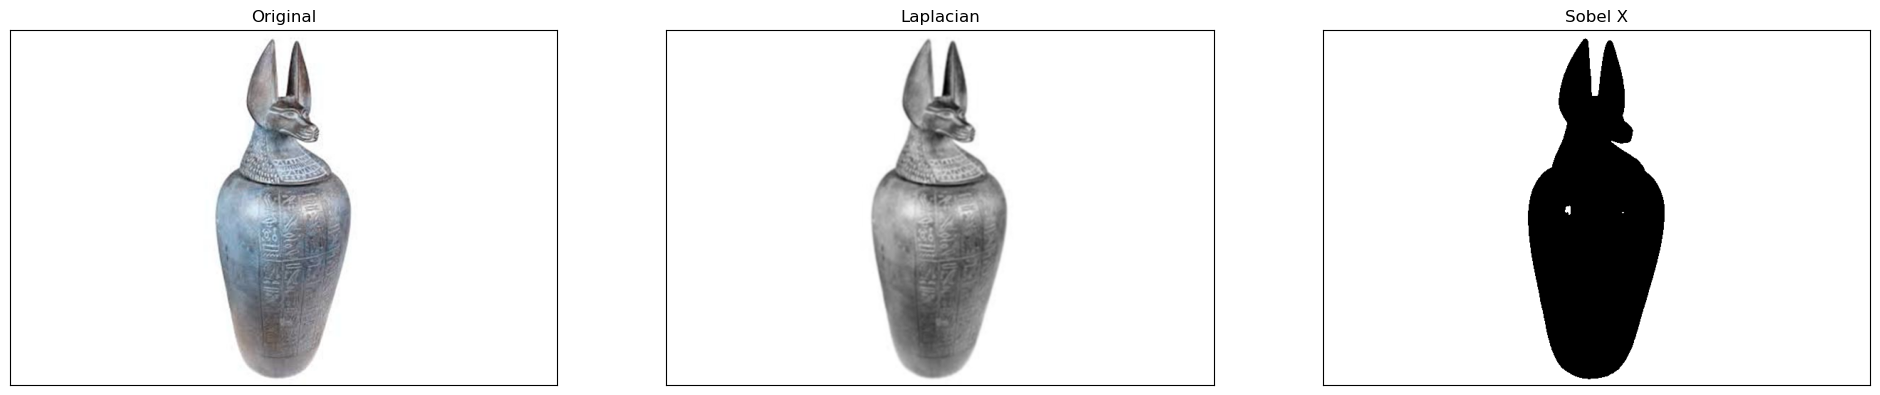

In [44]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(thresh,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [45]:
kernel3 = np.ones((3,3),np.uint8)
kernel5 = np.ones((5,5),np.uint8)
kernel7 = np.ones((7,7),np.uint8)
erosion = cv2.erode(thresh, kernel5, iterations = 1)

opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel5)


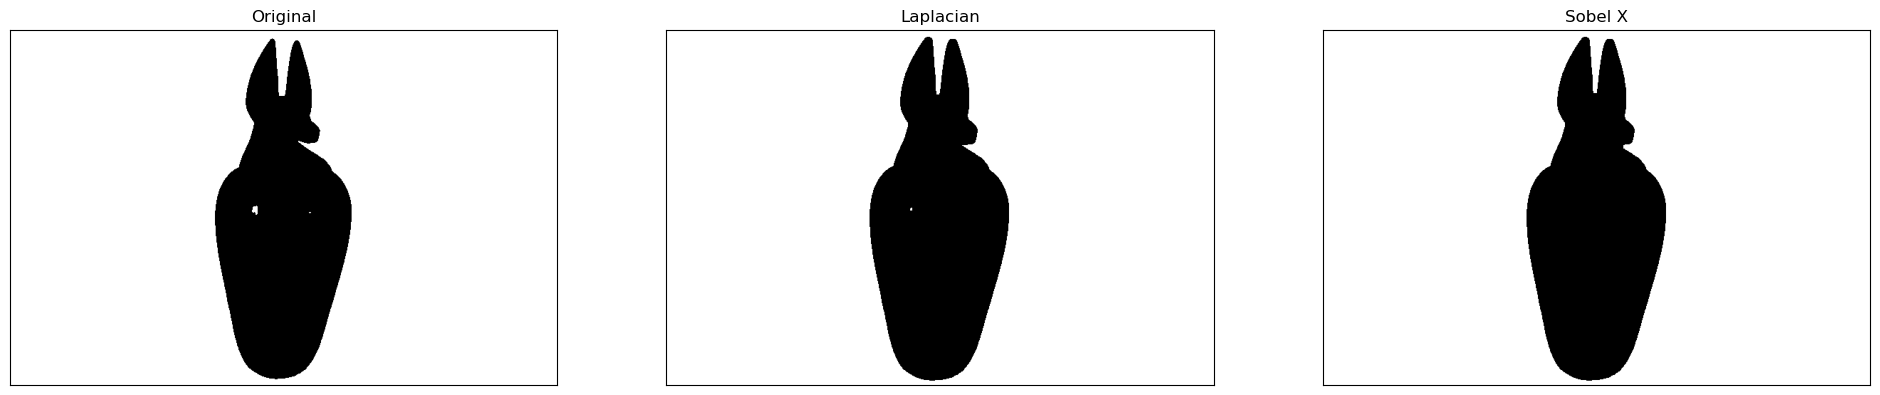

In [46]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(thresh,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(erosion,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(opening,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.show()

In [47]:
contours, hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img0 = im.copy()
img1 = im.copy()
img0 = cv2.drawContours(img0, contours, 0, (255,0,0), 3)
img1 = cv2.drawContours(img1, contours, 1, (0,255,0), 3)


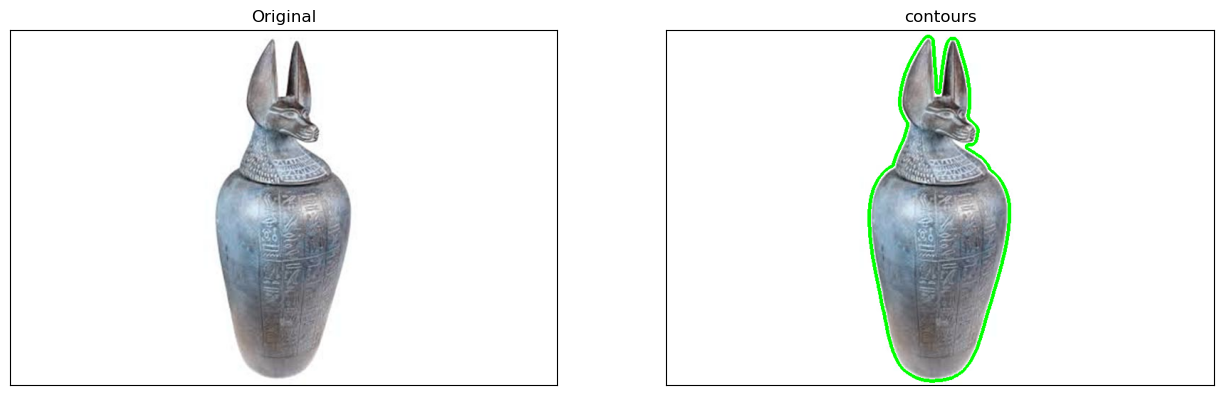

In [49]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1),plt.imshow(im)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(img1)
plt.title('contours'), plt.xticks([]), plt.yticks([])

plt.show()
